In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# joint limits
j_lims={}
j_lims[1]={ "lower":    -170
            ,"upper":    170
            ,"effort":   320
            ,"vel":      1.4835
            }
j_lims[2]={ "lower":    -120
            ,"upper":    120
            ,"effort":   320
            ,"vel":      1.4835
            }
j_lims[3]={ "lower":    -170
            ,"upper":    170
            ,"effort":   176
            ,"vel":      1.7453
            }
j_lims[4]={ "lower":    -120
            ,"upper":    120
            ,"effort":   176
            ,"vel":      1.3090
            }
j_lims[5]={ "lower":    -170
            ,"upper":    170
            ,"effort":   110
            ,"vel":      2.2689
            }
j_lims[6]={ "lower":    -120
            ,"upper":    120
            ,"effort":   40
            ,"vel":      2.3562
            }
j_lims[7]={ "lower":    -175
            ,"upper":    175
            ,"effort":   40
            ,"vel":      2.3562
            }

In [9]:
def generate_sine_trajectory(a, T, timestep, freqs, freq_scaler = 1):
    traj_len = int(T//timestep)
    print(traj_len)
    t = np.linspace(0,T, traj_len)
    qs=np.zeros((7,traj_len))
    for joint in range(7):
        f_s = 1/(timestep*freqs[joint])
        f = freqs[joint]*freq_scaler
        if not (2*f <= f_s):
            print("You're trying to represent a {} Hz signal with {} Hz timing".format(f,f_s))
            break
        x = np.linspace(0,T*f*2*np.pi,traj_len)
        qs[joint,:] = a*np.cos(x)
    return qs,t

In [10]:
def generate_trajectory_points(T, timestep):
    traj_len = int(T//timestep)
    print(traj_len)
    t = np.linspace(0,T, traj_len)
    qs=np.zeros((7,traj_len))
    for pose in range(traj_len):
        for i in range(7):
            qs[i,pose] = (np.random.random(1)[0]-0.5)*90
    return qs, t

In [11]:
def plot_with_joint_limits(joints, time):
    fig, ax = plt.subplots(2,4)
    for i in range (0,7):
        ax[i//4,i%4].fill_between(time, [j_lims[i+1]["lower"]], [j_lims[i+1]["upper"]], alpha=0.2)
        ax[i//4,i%4].plot(time, joints[i,:])
    plt.show()

120


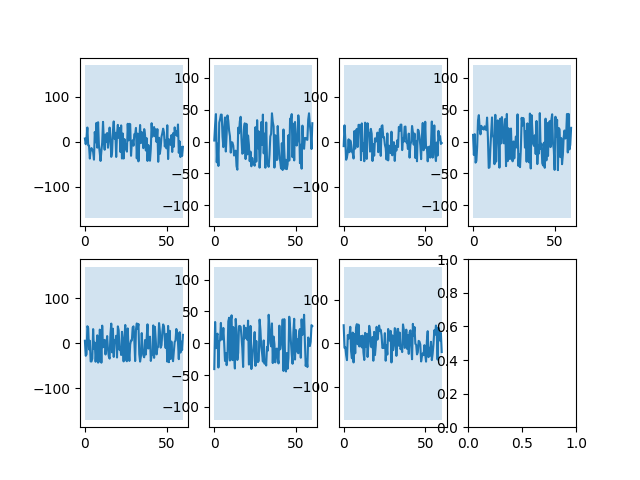

In [17]:
%matplotlib widget
# qs,x=generate_sine_trajectory(100,15,0.3,[1, 1, 1, 2, 2, 2, 3], 1/15)
qs, x = generate_trajectory_points(60,0.5)
df = pd.DataFrame(qs/180*np.pi)
df.to_csv("traj.csv")
plot_with_joint_limits(qs, x)